# Here we demonstrate some LLL examples

We note that in order to have a good code, we would like the minimum lattice vector of the **dual** lattice to be as large as possible. Here, we reproduce the Tab. IV in https://journals.aps.org/prxquantum/pdf/10.1103/PRXQuantum.3.010335 to 

1. Confirm that our code to get dual lattice is working correctly
2. Confirm that our code for LLL reduction is working correctly
3. Confirm that indeed D4 code is better than Tesseract, which in turn is better than the hexagonal code in terms of the norm of the logical operators

Further we shall repeat the analysis for two-mode screezing and see that if it is possible to beat D4


**conclusion**: For certain regime of G, it is possible that there are **two** dual lattice vectors for two-mode screezing to be bigger than that of D4!


In [2]:
ENV["JULIA_PKG_USE_CLI_GIT"] = "true"
using Pkg
Pkg.add(url = "git@ssh.gitlab.aws.dev:cqc/qat/latticealgorithms.jl.git", rev="master")

using LatticeAlgorithms
using LinearAlgebra
using Plots

    Updating git-repo `git@ssh.gitlab.aws.dev:cqc/qat/latticealgorithms.jl.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/Research/MultiModeGKP/LatticeAlgorithmDemonstration/Project.toml`
  No Changes to `~/Documents/Research/MultiModeGKP/LatticeAlgorithmDemonstration/Manifest.toml`


## Square lattice

In [2]:
Msq = [√2 0; 0 √2]
Msq_dual = GetSymplecticDual(Msq)
Bsq, Q, R, T = LLL(Msq_dual)
display(Bsq)
# [0 -1/√2; 1/√2 0]

2×2 Matrix{Float64}:
 0.0       -0.707107
 0.707107   0.0

## Hexagonal 

In [3]:
Mhex = 2/(3^(1/4)) * [[1 0]; [-1/2 √3/2]]
Mhex_dual = GetSymplecticDual(Mhex)

println("Before LLL, the norm of the dual lattice vectors are")
for i in 1 : size(Mhex_dual)[1]
    println("norm(v) = $(norm(Mhex_dual[i, :]))")
end
println("After LLL")

Bhex, Q, R, T = LLL(Mhex_dual)
display(Bhex)
# 1/2 * [3^(-1/4) -3^(1/4); 3^(-1/4) 3^(1/4)]

for i in 1 : size(Bhex)[1]
    println("norm(v) = $(norm(Bhex[i, :]))")
end


Before LLL, the norm of the dual lattice vectors are
norm(v) = 0.7598356856515927
norm(v) = 0.7598356856515928
After LLL


2×2 Matrix{Float64}:
 0.379918  -0.658037
 0.379918   0.658037

norm(v) = 0.7598356856515927
norm(v) = 0.7598356856515927


## Tesseract

In [4]:
MTess = 2^(1/4) * [1 0 0 0; 0 1/√2 0 1/√2; 0 0 1 0; 0 1/√2 0 -1/√2]
MTess_dual = GetSymplecticDual(MTess)


println("Before LLL, the norm of the dual lattice vectors are")
for i in 1 : size(MTess_dual)[1]
    println("norm(v) = $(norm(MTess_dual[i, :]))")
end
println("After LLL")

BTess, Q, R, T = LLL(MTess_dual)
display(BTess)


for i in 1 : size(BTess)[1]
    println("norm(v) = $(norm(BTess[i, :]))")
end


Before LLL, the norm of the dual lattice vectors are
norm(v) = 0.8408964152537146
norm(v) = 0.8408964152537147
norm(v) = 0.8408964152537146
norm(v) = 0.8408964152537147
After LLL


4×4 Matrix{Float64}:
 0.0       -0.840896     0.0       -1.7664e-17
 0.594604   0.0          0.594604   0.0
 0.0       -1.7664e-17   0.0       -0.840896
 0.594604   0.0         -0.594604   0.0

norm(v) = 0.8408964152537146
norm(v) = 0.8408964152537147
norm(v) = 0.8408964152537146
norm(v) = 0.8408964152537147


## D4

In [5]:
MD4 = [1 0 1 0; 1 0 0 -1; 0 1 -1 0; 1 0 0 1]
MD4_dual = GetSymplecticDual(MD4)

println("Before LLL, the norm of the dual lattice vectors are")
for i in 1 : size(MD4_dual)[1]
    println("norm(v) = $(norm(MD4_dual[i, :]))")
end
println("After LLL")

BD4, Q, R, T = LLL(MD4_dual)
display(BD4)


for i in 1 : size(BD4)[1]
    println("norm(v) = $(norm(BD4[i, :]))")
end


Before LLL, the norm of the dual lattice vectors are
norm(v) = 1.4142135623730951
norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0
After LLL


4×4 Matrix{Float64}:
 -0.5  -0.5  -0.5   0.5
  1.0   0.0   0.0   0.0
 -0.5  -0.5  -0.5  -0.5
 -0.5  -0.5   0.5   0.5

norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0


# D8

In [5]:
MD8 = [1 -1 0 0 0 0 0 0; 
        0 1 -1 0 0 0 0 0;
        0 0 1 -1 0 0 0 0;
        0 0 0 1 -1 0 0 0;
        0 0 0 0 1 -1 0 0;
        0 0 0 0 0 1 -1 0;
        0 0 0 0 0 0 1 -1;
        0 0 0 0 0 0  1 1]
MD8_dual = GetSymplecticDual(MD8)

println("Before LLL, the norm of the dual lattice vectors are")
for i in 1 : size(MD8_dual)[1]
    println("norm(v) = $(norm(MD8_dual[i, :]))")
end
println("After LLL")

BD8, Q, R, T = LLL(MD8_dual)
display(BD8)


for i in 1 : size(BD8)[1]
    println("norm(v) = $(norm(BD8[i, :]))")
end


Before LLL, the norm of the dual lattice vectors are
norm(v) = 1.0
norm(v) = 1.4142135623730951
norm(v) = 1.7320508075688772
norm(v) = 2.0
norm(v) = 2.23606797749979
norm(v) = 2.449489742783178
norm(v) = 1.4142135623730951
norm(v) = 1.4142135623730951
After LLL


8×8 Matrix{Float64}:
 0.0  -1.0  0.0   0.0  0.0   0.0   0.0   0.0
 1.0   0.0  0.0   0.0  0.0   0.0   0.0   0.0
 0.0   0.0  0.0  -1.0  0.0   0.0   0.0   0.0
 0.0   0.0  1.0   0.0  0.0   0.0   0.0   0.0
 0.0   0.0  0.0   0.0  0.0  -1.0   0.0   0.0
 0.0   0.0  0.0   0.0  1.0   0.0   0.0   0.0
 0.5  -0.5  0.5  -0.5  0.5  -0.5  -0.5  -0.5
 0.5  -0.5  0.5  -0.5  0.5  -0.5   0.5  -0.5

norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.0
norm(v) = 1.4142135623730951
norm(v) = 1.4142135623730951


# E8

In [6]:
ME8 = [2 0 0 0 0 0 0 0; 
        -1 1 0 0 0 0 0 0;
        0 -1 1 0 0 0 0 0;
        0 0 -1 1 0 0 0 0;
        0 0 0 -1 1 0 0 0;
        0 0 0 0 -1 1 0 0;
        0 0 0 0 0 -1 1 0;
        1/2 1/2 1/2 1/2 1/2 1/2 1/2 1/2] * 2^(1/8) # To make sure det = 2 

ME8_dual = GetSymplecticDual(ME8)

println("Before LLL, the norm of the dual lattice vectors are")
for i in 1 : size(ME8_dual)[1]
    println("norm(v) = $(norm(ME8_dual[i, :]))")
end
println("After LLL")

BE8, Q, R, T = LLL(ME8_dual)
display(BE8)


for i in 1 : size(BE8)[1]
    println("norm(v) = $(norm(BE8[i, :]))")
end


Before LLL, the norm of the dual lattice vectors are
norm(v) = 3.4311149519583286
norm(v) = 5.942865423401072
norm(v) = 5.022637997866402
norm(v) = 4.100966752495597
norm(v) = 3.1765951871531524
norm(v) = 2.2461919979205436
norm(v) = 1.296839554651009
norm(v) = 1.8340080864093427
After LLL


8×8 Matrix{Float64}:
 -1.11022e-16   0.917004     -3.33067e-16  …   0.917004     -1.11022e-16
 -0.917004     -0.917004      3.33067e-16     -8.88178e-16   1.11022e-16
  3.33067e-16  -2.22045e-16   3.33067e-16      0.917004     -1.11022e-16
  0.0          -2.22045e-16  -0.917004         0.917004      0.0
 -0.458502     -0.458502     -0.458502        -0.458502     -0.458502
  0.458502      0.458502     -0.458502     …   0.458502     -0.458502
  0.458502      0.458502     -0.458502         0.458502      0.458502
 -0.458502     -0.458502      0.458502        -0.458502     -0.458502

norm(v) = 1.2968395546510105
norm(v) = 1.29683955465101
norm(v) = 1.2968395546510094
norm(v) = 1.2968395546510096
norm(v) = 1.2968395546510094
norm(v) = 1.29683955465101
norm(v) = 1.2968395546510094
norm(v) = 1.2968395546510094


## Two mode squeezing

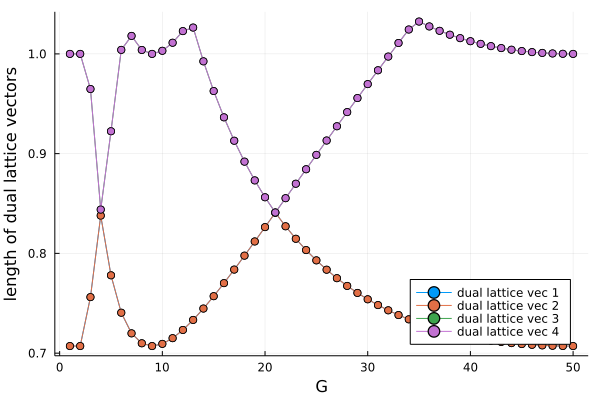

In [6]:
S_TS(G) = [[√G 0 √(G-1) 0]; [0 √G 0 -√(G-1)]; [√(G-1) 0 √G 0]; [0 -√(G-1) 0 √G]]

Msq2 = [√2 0 0 0; 0 √2 0 0; 0 0 1 0; 0 0 0 1]

M_TS(G) = Msq2 * transpose(S_TS(G))

# Glist = 1 : (10/20) : 11
Glist = range(start = 1, step = 1, stop = 50)

TS_LLL_basis_norms_list = []

for G in Glist
    M_TS_dual = GetSymplecticDual(M_TS(G))
    BTS, Q, R, T = LLL(M_TS_dual)

#     BTS, Q, R, T = LLL(M_TS(G))    
    
#     BTS = GetSymplecticDual(BTS)
    
    
    norms = []
    for i in 1 : size(BTS)[1]
        push!(norms, norm(BTS[i, :]))
    end
    push!(TS_LLL_basis_norms_list, sort!(norms))
end

g = plot()
for i = 1 : 4
    plot!(Glist, [item[i] for item in TS_LLL_basis_norms_list], marker=:circle, label="dual lattice vec " * string(i),legend=:bottomright)
end
plot!(xlabel="G", ylabel="length of dual lattice vectors")
g

savefig(g, "plots/ShortestDualLatticeVector_TwoModeSqueezing.png")

return g


# More examples with beam splitter

## Beam splitter

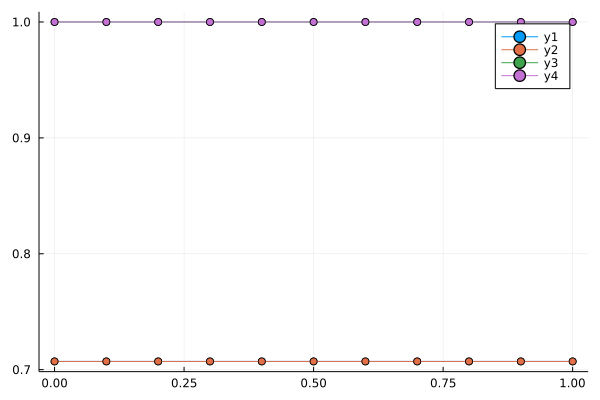

In [118]:
S_BS(η) = [[√η 0 √(1-η) 0]; [0 √η 0 √(1-η)]; [-√(1-η) 0 √η 0]; [0 -√(1-η) 0 √η]]

Msq2 = [√2 0 0 0; 0 √2 0 0; 0 0 1 0; 0 0 0 1]

M_BS(η) = Msq2 * transpose(S_BS(η))

ηlist = 0:1/10:1
# Glist = range(start = 1, step = 1, stop = 100)

BS_LLL_basis_norms_list = []

for η in ηlist
    M_BS_dual = GetSymplecticDual(M_BS(η)) 
    BBS, Q, R, T = LLL(M_BS_dual)
    norms = []
    for i in 1 : size(BBS)[1]
        push!(norms, norm(BBS[i, :]))
    end
    push!(BS_LLL_basis_norms_list, sort!(norms))
end

g = plot()
for i = 1 : 4 
    plot!(ηlist, [item[i] for item in BS_LLL_basis_norms_list], marker=:circle)
end
g

## Beam splitter + Two mode squeezing

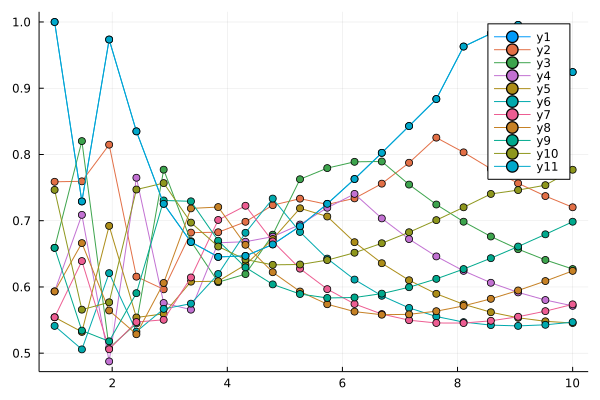

In [119]:
S_TS(G) = [[√G 0 √(G-1) 0]; [0 √G 0 -√(G-1)]; [√(G-1) 0 √G 0]; [0 -√(G-1) 0 √G]]

S_BS(η) = [[√η 0 √(1-η) 0]; [0 √η 0 √(1-η)]; [-√(1-η) 0 √η 0]; [0 -√(1-η) 0 √η]]

# S_TS_BS(G, η) = S_TS(G) * S_BS(η)
# S_TS_BS(G, η) = S_TS(G) * S_BS(η) * inv(S_TS(G))
# S_TS_BS(G, η) = S_BS(η) * S_TS(G)
# S_TS_BS(G, η) = S_BS(η) * S_TS(G) * S_BS(η)
# S_TS_BS(G, η) = S_BS(η) * S_TS(G) * inv(S_BS(η))
# S_TS_BS(G, η) = S_TS(G) * S_BS(η) * S_TS(G)


Msq2 = [√2 0 0 0; 0 √2 0 0; 0 0 1 0; 0 0 0 1]

M_TS_BS(G, η) = Msq2 * transpose(S_TS_BS(G, η))

ηlist = 0:1/10:1
Glist = range(start = 1, length = 20, stop = 10)

TS_BS_LLL_basis_norms_list = []

for η in ηlist
    templist = []
    for G in Glist

        M_TS_BS_dual = GetSymplecticDual(M_TS_BS(G, η)) 
        BBS, Q, R, T = LLL(M_TS_BS_dual)

        
        norms = []
        for i in 1 : size(BBS)[1]
            push!(norms, norm(BBS[i, :]))
        end
        push!(templist, sort!(norms))
            
    end
    push!(TS_BS_LLL_basis_norms_list, templist)
end

g = plot()
for i = 1 : length(ηlist)
    templist = TS_BS_LLL_basis_norms_list[i]
    plot!(Glist, [item[1] for item in templist], marker=:circle)
end

g

# Two mode squeezing with D4

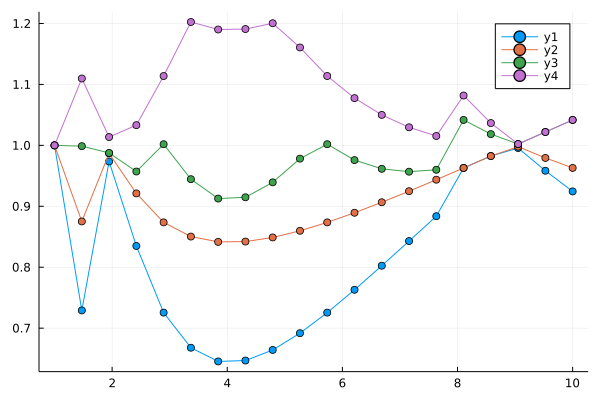

In [120]:
S_TS(G) = [[√G 0 √(G-1) 0]; [0 √G 0 -√(G-1)]; [√(G-1) 0 √G 0]; [0 -√(G-1) 0 √G]]

Msq2 = [√2 0 0 0; 0 √2 0 0; 0 0 1 0; 0 0 0 1]

M_D4 = [1 0 1 0; 1 0 0 -1; 0 1 -1 0; 1 0 0 1]
_, _, S_D4 = GetSymplecticU(Msq2, M_D4)



# M_TS_D4(G) = Msq2 * transpose(S_TS(G) * S_D4)
M_TS_D4(G) = Msq2 * transpose(S_D4 * S_TS(G))

Glist = range(start = 1, length = 20, stop = 10)

TS_D4_LLL_basis_norms_list = []

for G in Glist

    M_TS_D4_dual = GetSymplecticDual(M_TS_D4(G)) 
    BBS, Q, R, T = LLL(M_TS_D4_dual)

    norms = []
    for i in 1 : size(BBS)[1]
        push!(norms, norm(BBS[i, :]))
    end
    push!(TS_D4_LLL_basis_norms_list, sort!(norms))

end

g = plot()

for i = 1 : 4
    plot!(Glist, [item[i] for item in TS_D4_LLL_basis_norms_list], marker=:circle)
end

g

## Beam splitter + Two mode squeezing + D4

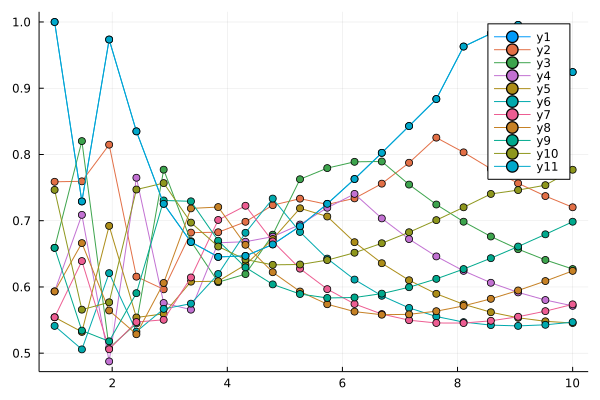

In [121]:
S_TS(G) = [[√G 0 √(G-1) 0]; [0 √G 0 -√(G-1)]; [√(G-1) 0 √G 0]; [0 -√(G-1) 0 √G]]

S_BS(η) = [[√η 0 √(1-η) 0]; [0 √η 0 √(1-η)]; [-√(1-η) 0 √η 0]; [0 -√(1-η) 0 √η]]


Msq2 = [√2 0 0 0; 0 √2 0 0; 0 0 1 0; 0 0 0 1]

M_D4 = [1 0 1 0; 1 0 0 -1; 0 1 -1 0; 1 0 0 1]
_, _, S_D4 = GetSymplecticU(Msq2, M_D4)



# S_TS_BS(G, η) = S_TS(G) * S_D4 * S_BS(η)
# S_TS_BS(G, η) = S_TS(G) * S_BS(η) * inv(S_TS(G))
# S_TS_BS(G, η) = S_BS(η) * S_D4 * S_TS(G)
# S_TS_BS(G, η) = S_BS(η) * S_TS(G) * S_BS(η)
# S_TS_BS(G, η) = S_BS(η) * S_TS(G) * inv(S_BS(η))
# S_TS_BS(G, η) = S_TS(G) * S_BS(η) * S_TS(G)
S_TS_BS(G, η) = S_D4 * S_BS(η) * S_TS(G)


M_TS_BS(G, η) = Msq2 * transpose(S_TS_BS(G, η))

ηlist = 0:1/10:1
Glist = range(start = 1, length = 20, stop = 10)

TS_BS_LLL_basis_norms_list = []

for η in ηlist
    templist = []
    for G in Glist

        M_TS_BS_dual = GetSymplecticDual(M_TS_BS(G, η)) 
        BBS, Q, R, T = LLL(M_TS_BS_dual)

        
        norms = []
        for i in 1 : size(BBS)[1]
            push!(norms, norm(BBS[i, :]))
        end
        push!(templist, sort!(norms))
            
    end
    push!(TS_BS_LLL_basis_norms_list, templist)
end

g = plot()
for i = 1 : length(ηlist)
    templist = TS_BS_LLL_basis_norms_list[i]
    plot!(Glist, [item[1] for item in templist], marker=:circle)
end

g